In [1]:
import numpy as np
import pandas as pd
import os,sys
sys.path.append(os.path.abspath('./../../'))
from cell_extractor.diagnostics.ToolKit import get_DataFrame_from_query_result,find_equivalence,find_agreement,get_DataFrame_from_detection_df
from Controllers.MarkedCellController import MarkedCellController
from Controllers.SqlController import SqlController
from cell_extractor.CellAnnotationUtilities import CellAnnotationUtilities
from cell_extractor.CellDetectorBase import CellDetectorBase
from cell_extractor.CellDetectorTrainer import CellDetectorTrainer
from cell_extractor.utils import get_ids_in_subcategory
import pickle

/usr/local/share/pipeline/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


1.5.0


In [2]:
import pickle
old_train_features = pickle.load(open('/home/zhw272/programming/round3_DK41_agreement_feature.pkl','rb'))

In [4]:
animal = 'DK41'
base = CellDetectorBase(animal,round=2)
features = base.get_combined_features()

In [5]:
controller = SqlController()
factor = controller.get_resolution(animal)
controller = MarkedCellController()
search_dict = {'FK_prep_id':animal,'FK_cell_type_id':1,'FK_annotator_id':2}
beth_positives = get_DataFrame_from_query_result(controller.get_marked_cells(search_dict),'Original',factor)
search_dict = {'FK_prep_id':animal,'FK_cell_type_id':22,'FK_annotator_id':38}
sure = get_DataFrame_from_query_result(controller.get_marked_cells(search_dict),'Sure',factor)
search_dict = {'FK_prep_id':animal,'FK_cell_type_id':23,'FK_annotator_id':38}
unsure = get_DataFrame_from_query_result(controller.get_marked_cells(search_dict),'Unsure',factor)

positives = pd.concat([beth_positives,sure[sure.name=='Sure_Marissa_POSITIVE'],unsure[unsure.name=='Unsure_Marissa_POSITIVE']])
negative = pd.concat([sure[sure.name=='Sure_Marissa_NEGATIVE'],unsure[unsure.name=='Unsure_Marissa_NEGATIVE']])


In [6]:
positives.name.unique(),negative.name.unique()

(array(['Original_Beth_POSITIVE', 'Sure_Marissa_POSITIVE',
        'Unsure_Marissa_POSITIVE'], dtype=object),
 array(['Sure_Marissa_NEGATIVE', 'Unsure_Marissa_NEGATIVE'], dtype=object))

In [7]:
positives_ids = get_ids_in_subcategory(features,positives,max_distance=100)
negative_ids = get_ids_in_subcategory(features,negative)

skipping, min distance 212.461761265407
skipping, min distance 151.3991941072761


In [8]:
all_ids = positives_ids+negative_ids
len(positives_ids),len(negative_ids),len(all_ids)

(964, 53, 1017)

In [9]:
features.label = 0
features.label[positives_ids] = 1
train_features = features.iloc[all_ids]
drops = ['animal', 'section', 'index', 'row', 'col'] 
train_features=train_features.drop(drops,axis=1)
len(train_features),len(all_ids),sum(train_features.label),len(positives_ids)

/tmp/ipykernel_197116/1451238997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.label[positives_ids] = 1


(1017, 1017, 965, 964)

In [10]:
train_features = pd.concat([old_train_features,train_features])

In [11]:
len(train_features)

132162

{'eta': 0.3, 'objective': 'binary:logistic', 'nthread': 7}
(66081, 41) (65936, 41) (66081,) (132162, 41)


/usr/local/share/pipeline/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/usr/local/share/pipeline/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/usr/local/share/pipeline/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/usr/local/share/pipeline/lib/python3.8/site-packages/xgboost/training.py:17: UserWarning: Old style callback is deprecat

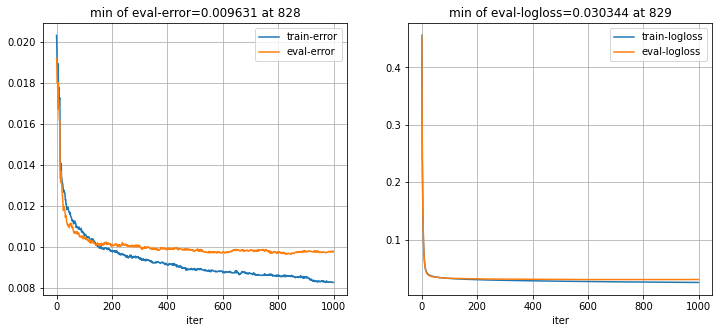

1
(66081, 41) (65941, 41) (66081,) (132162, 41)


/usr/local/share/pipeline/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/usr/local/share/pipeline/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/usr/local/share/pipeline/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/usr/local/share/pipeline/lib/python3.8/site-packages/xgboost/training.py:17: UserWarning: Old style callback is deprecat

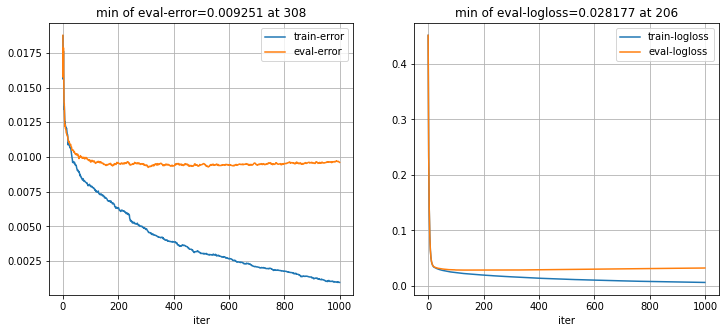

2
(66081, 41) (65909, 41) (66081,) (132162, 41)


/usr/local/share/pipeline/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/usr/local/share/pipeline/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/usr/local/share/pipeline/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/usr/local/share/pipeline/lib/python3.8/site-packages/xgboost/training.py:17: UserWarning: Old style callback is deprecat

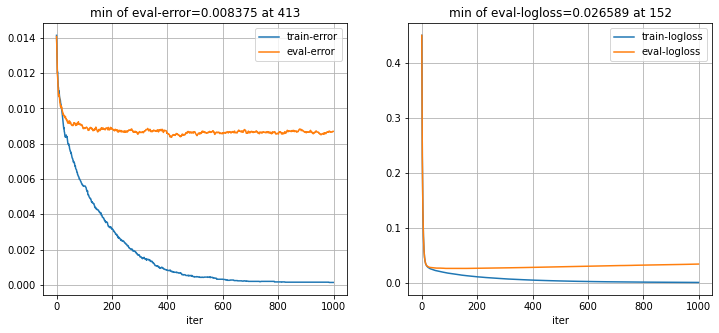

3


In [13]:
trainer = CellDetectorTrainer('DK41',round=4)
trainer.test_xgboost(train_features,depths=[1,2,3])

In [ ]:
trainer = CellDetectorTrainer('DK41',round=4)
new_models = trainer.train_classifier(train_features,2,204)

{'eta': 0.3, 'objective': 'binary:logistic', 'nthread': 7}
(829, 41) (829, 41) (829,) (1658, 41)
(829, 41) (829, 41) (829,) (1658, 41)
[14:26:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


TypeError: predict() got an unexpected keyword argument 'xgb_model'

In [ ]:
trainer.save_models(new_models)